In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
news_article = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/Week 3/news_articles.csv")
df = news_article.copy()

In [4]:
df.head()

,Text
0,Budget to set scene for election\n \n Gordon B...
1,Army chiefs in regiments decision\n \n Militar...
2,Howard denies split over ID cards\n \n Michael...
3,Observers to monitor UK election\n \n Minister...
4,Kilroy names election seat target\n \n Ex-chat...


In [5]:
df.shape

(2225, 1)

Data cleaning

In [6]:
df.isnull().sum()

,0
Text,0


In [7]:
df.duplicated().sum()

98

In [8]:
df[df['Text']=='''Blair backs 'pre-election budget'

 Tony Blair has backed Chancellor Gordon Brown's pre-Budget report amid opposition claims he was too bullish about the state of the UK economy.

 In a speech in Edinburgh, the prime minister said Thursday's report reinforced stability and opportunity. And that would be central to Labour's next election campaign, planning for which was already well advanced. Mr Brown earlier denied his economic forecasts were too optimistic - but refused to rule out future tax rises.

 He told BBC Radio 4's Today programme: "No politician should make the mistake that John Major and his colleagues made in 1992 of saying no matter what the circumstances are, they can make all sorts of guarantees on every individual thing.

 "That is not what politicians should do, it would not be responsible to do." Mr Brown insisted his spending plans were "affordable" and he could afford to be optimistic because Britain was now a stable, low-inflation economy and house prices were now stabilising. Mr Blair praised his chancellor for his role in creating economic stability, which he said was the "cornerstone" of Labour's programme.

 In a speech at Edinburgh's Napier University, he said Labour would publish over the next few months "a rich agenda for future policy in any possible third term".

 "In every area of work there is a detailed plan for the future, much clearer than those in 1997 or 2001. All of it fits together around common themes of opportunity, security and stability for all," Mr Blair said. In his pre-Budget report, Mr Brown surprised some City experts by forecasting UK growth at between 3% and 3.5% for next year. Many believe the figure is more likely to be under 3% - and fear tax rises or spending cuts, saying tax receipts have been overestimated. Carl Emmerson, from the Institute for Fiscal Studies, told BBC News: "He thinks everything will come out in the wash and it will, in fact, be OK. We're not so sure." David Page, of Investec Securities, said: "His forecast that he will meet the golden rule with a margin of Â£8bn is way too optimistic. "It's going to take a significant turnaround in the economy to meet these targets."

 Conservative Shadow chancellor Oliver Letwin said: "I can't find a single economic forecaster from the IMF to the Institute of Fiscal Studies who believes anything other than the chancellor has got a black hole in his finances. "In order to deal with that he will have to raise taxes after the next general election." Mr Letwin accused the chancellor of using "fancy statistics" to hide public service failures. Vincent Cable, for the Liberal Democrats, called on Mr Brown to open up the government's books to the National Audit Office, to see if he had met his "golden rule". "It is very clear that there are some serious loose ends in government public spending," Mr Cable told MPs.
''']

,Text
33,Blair backs 'pre-election budget'\n \n Tony Bl...
59,Blair backs 'pre-election budget'\n \n Tony Bl...


In [9]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

Model building

In [10]:
from sentence_transformers import SentenceTransformer

In [75]:
model_sent = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [76]:
text = ["I love cats", "dogs are good"]
model_sent.encode(text).shape

(2, 384)

In [77]:
model_sent.encode(text)

array([[ 3.07687595e-02, -1.32154310e-02,  6.75261319e-02,
        -3.69996880e-03, -6.50870278e-02, -2.56481022e-02,
         8.86388272e-02,  1.83732230e-02,  3.94839309e-02,
         4.81760688e-02, -1.90982874e-02, -4.61932383e-02,
        -3.17090563e-02,  5.93409203e-02,  1.91239826e-02,
        -1.92626938e-02, -5.31719886e-02, -1.85153466e-02,
        -5.45592979e-02,  2.49685254e-02, -1.34725854e-01,
         4.09461111e-02,  4.79657110e-03,  2.03396170e-03,
        -9.11346823e-02,  3.63655053e-02, -2.79360451e-02,
        -5.65407760e-02, -3.68675403e-02, -8.17124546e-03,
        -3.24066170e-02,  1.95250157e-02, -7.14395521e-03,
         4.36081886e-02, -5.47204241e-02, -3.16660991e-03,
         1.97083298e-02,  1.79345591e-03,  5.24748266e-02,
         7.94551224e-02, -4.84562926e-02, -8.45717173e-03,
         3.89589295e-02, -8.18031374e-03, -8.12430680e-02,
        -1.82233341e-02,  8.29082355e-03, -9.07547548e-02,
         8.92886370e-02,  1.26342652e-02,  2.68925745e-0

In [78]:
import torch

In [79]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [80]:
embedding_matrix = model_sent.encode(df['Text'], device=device, show_progress_bar=True)
embedding_matrix.shape

Batches:   0%|          | 0/67 [00:00<?, ?it/s]

(2127, 384)

In [81]:
from sklearn.metrics.pairwise import cosine_similarity

In [82]:
def get_tok_k_similarity(embedding_matrix, query_text, k):
  query_encoded = model_sent.encode(query_text)
  similarity_scores = cosine_similarity(embedding_matrix, [query_encoded]).flatten()
  top_k_indices = np.argsort(similarity_scores)[::-1][:k]
  return df.loc[top_k_indices, "Text"]

In [83]:
query_text = "Budget for election"
result = get_tok_k_similarity(embedding_matrix, query_text, 5)
result

,Text
67,'Debate needed' on donations cap\n \n A cap on...
356,Brown names 16 March for Budget\n \n Chancello...
150,Will the Budget bring out smiling voters?\n \n...
126,Brown names 16 March for Budget\n \n Chancello...
1956,Bush budget seeks deep cutbacks\n \n President...


In [84]:
result.iloc[0]

'\'Debate needed\' on donations cap\n \n A cap on donations to political parties should not be introduced yet, the elections watchdog has said.\n \n Fears that big donors can buy political favours have sparked calls for a limit. In a new report, the Electoral Commission says it is worth debating a Â£10,000 cap for the future but now is not the right time to introduce it. It also says there should be more state funding for political parties and candidates should be able to spend more on election campaigning.\n \n There were almost Â£68m in reported donations to political parties in 2001, 2002 and 2003, with nearly Â£12m of them from individual gifts worth more than Â£1m. The rules have already been changed so the public can see who gives how much to the parties but the report says there are still public suspicions. The commission says capping donations would mean taxpayers giving parties more cash - something which would first have to be acceptable to the public and shown to work. "Whil

In [85]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
clusters = np.arange(2,10)
wcss = []
silhouette_scores = []
for k in clusters:
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(embedding_matrix)
  wcss.append(kmeans.inertia_)

  silhouette_scores.append(silhouette_score(embedding_matrix, kmeans.labels_))

In [88]:
silhouette_scores

[0.0468115,
 0.049642824,
 0.06065065,
 0.06735046,
 0.060966,
 0.058022,
 0.053445686,
 0.050674997]

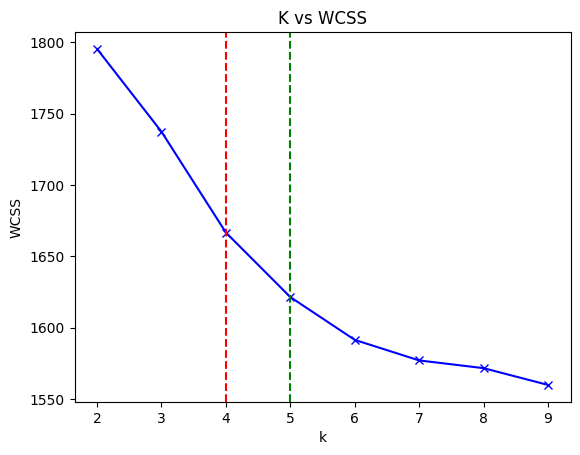

In [91]:
plt.plot(clusters, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.axvline(x=4, linestyle='--', color='r')
plt.axvline(x=5, linestyle='--', color='g')
plt.title('K vs WCSS')
plt.show()

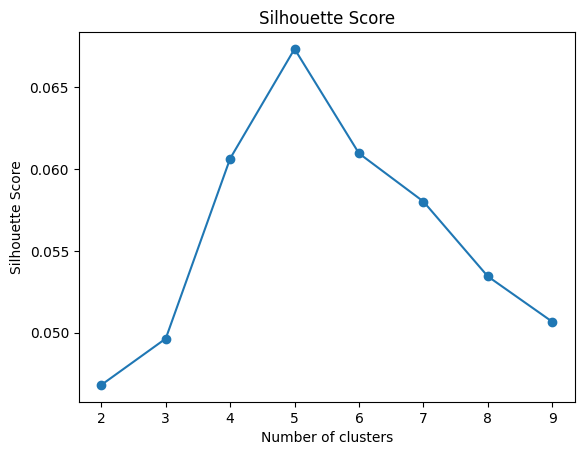

In [92]:
# Plot Silhouette Scores
plt.plot(clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.show()

* note: We can create 5 categories based on the news articles

In [93]:
k=5
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(embedding_matrix)
predictions = kmeans.predict(embedding_matrix)

In [94]:
df['label'] = predictions

In [95]:
df['label'].value_counts()

,count
label,
0,508
3,485
1,402
4,370
2,362


In [96]:
labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/Week 3/news_article_labels.csv")

In [97]:
labels.value_counts()

,count
Label,
Sports,505
Business,503
Politics,403
Entertainment,369
Technology,347


In [100]:
# Select one random text per unique label
sampled_df = df.groupby('label').apply(lambda x: x.sample(1, random_state=42)).reset_index(drop=True)

# Print the output in the desired format
for label, text in zip(sampled_df['label'], sampled_df['Text']):
    print(f"Label {label} -> {text}")

Label 0 -> South Africa sweep top awards
 
 South Africa's Schalk Burger was named player of the year as the Tri-Nations champions swept the top honours at the International Rugby Board's awards.
 
 The flanker topped a list which included Ireland star Gordon D'Arcy and Australian sensation Matt Giteau. Jake White claimed the coaching award while his side held off Grand Slam winners France to take the team award. England player Simon Amor beat team-mate Ben Gollings and Argentine Lucio Lopez Fleming to win the sevens award. Burger's award came just a week after he won the equivalent prize from his fellow international players and White, who also coached Burger at under-21 level, paid tribute to him. "Schalk's emergence as a major force has meant a lot to South African rugby, but has also influenced world rugby," said White. "He's become to South African rugby what Jonty Rhodes was to South African cricket. It's amazing what he has achieved in such a short time so far in his internation

In [99]:
from sklearn.metrics import classification_report

In [101]:
category_dict = {
     0: 'Sports',
     1: 'Politics',
     2: 'Entertainment',
     3: 'Business',
     4: 'Technology'
}

In [102]:
# mapping cluster labels to categories
df['label'] = df['label'].map(category_dict)
df.head()

,Text,label,actual_labels
0,Budget to set scene for election\n \n Gordon B...,Politics,Politics
1,Army chiefs in regiments decision\n \n Militar...,Politics,Politics
2,Howard denies split over ID cards\n \n Michael...,Politics,Politics
3,Observers to monitor UK election\n \n Minister...,Politics,Politics
4,Kilroy names election seat target\n \n Ex-chat...,Politics,Politics


In [103]:
df['actual_labels'] = labels['Label']

In [104]:
from sklearn.metrics import classification_report

In [105]:
print(classification_report(df['label'], df['actual_labels']))

               precision    recall  f1-score   support

     Business       0.93      0.96      0.95       485
Entertainment       0.95      0.96      0.95       362
     Politics       0.95      0.96      0.95       402
       Sports       0.99      0.98      0.99       508
   Technology       0.97      0.91      0.93       370

     accuracy                           0.96      2127
    macro avg       0.96      0.95      0.96      2127
 weighted avg       0.96      0.96      0.96      2127



Analyse incorrect predictions

In [108]:
# creating a dataframe of incorrect categorizations
incorrect_category_data = df[df['actual_labels'] != df['label']].copy()
incorrect_category_data.shape

(91, 3)

In [109]:
incorrect_category_data.head()

,Text,label,actual_labels
24,'Hitler' row over Welsh arts cash\n \n An arti...,Entertainment,Politics
34,Final hunts held as ban looms\n \n Hunts in En...,Technology,Politics
45,Drive to 'save' festive holidays\n \n Efforts ...,Business,Politics
52,Sport betting rules in spotlight\n \n A group ...,Sports,Politics
123,EU fraud clampdown urged\n \n EU member states...,Business,Politics
